In [5]:
import joblib
import numpy as np
import csv
from matplotlib import pyplot as plt

In [13]:
kmeans = joblib.load("./clusterWO27/kmeans.pkl")
data_center = np.load("./clusterWO27/kmeansClusterCenters.npz")
data_labels = np.load("./clusterWO27/kmeansClusterLabels.npz")
print(kmeans)
print(data_labels.files)
centers = data_center["arr_0"]
o_labels = data_labels["arr_0"]
print(f'shape of centers {centers.shape}')
print(f'shape of labesl {o_labels.shape}')

KMeans(n_clusters=4, n_init=10)
['arr_0']
shape of centers (4, 60)
shape of labesl (286, 852000)


In [23]:
#training_day_two = o_labels[:,214585:429170]
#training_day_seven = o_labels[:,1287507:1502100]
labels = o_labels
print(labels.shape)
def count_count_clusters(labels):
    two = np.count_nonzero(labels == 2)
    three = np.count_nonzero(labels == 3)
    one = np.count_nonzero(labels == 1)
    zero = np.count_nonzero(labels == 0)
    return zero, one, two, three
zero, one, two, three = count_count_clusters(labels)

#day_two_zero, day_two_one, day_two_two, day_two_three = count_count_clusters(training_day_two)
#d7_zero, d7_one, d7_two, d7_three = count_count_clusters(training_day_seven)

car_counts = np.sum(labels == 2, axis=1)
print(car_counts.shape)
print(f'entire training set zeros cluster members = {zero}, one cluster members {one}, two cluster members = {two} three cluster members ={three}')
#print(f'day two of training zeros cluster members = {day_two_zero}, one cluster members {day_two_one}, two cluster members = {day_two_two} three cluster members ={day_two_three}')
#print(f'day seven of training zeros cluster members = {d7_zero}, one cluster members {d7_one}, two cluster members = {d7_two} three cluster members ={d7_three}')


(286, 852000)
(286,)
entire training set zeros cluster members = 213965547, one cluster members 36255, two cluster members = 27927087 three cluster members =1743111


106


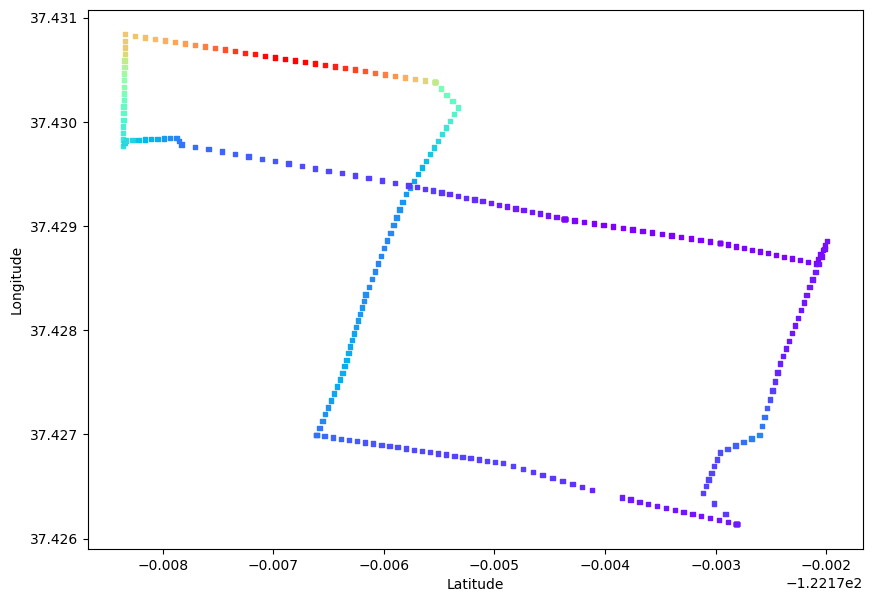

37.42646448405942


In [24]:
def read_csv(csv_filename):
    with open(csv_filename, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        csvlist = [row for row in csv_reader]
    return csvlist
DAS_1_dir_example = './DAS-1-Stanford-Campus/'

normed_counts = car_counts / np.max(car_counts)


csvtmp = read_csv('Stanford-1-Campus-geometry.csv')
lon1 = np.asarray([float(csvtmp[i][2]) for i in range(1,len(csvtmp))])
lat1 = np.asarray([float(csvtmp[i][3]) for i in range(1,len(csvtmp))])
lon1 = lon1[15:301]
lat1 = lat1[15:301]
ch_order = normed_counts
print(np.argmax(ch_order))

plt.figure(figsize=[10,7])
plt.scatter(lon1, lat1, marker='s', c=ch_order,  s=10, cmap="rainbow")

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
print(lat1[0])